##  1.基于高斯分布的熵计算

高斯分布的概率函数：<br>
$p(x)=\frac{1}{\sqrt{2 \pi} \sigma_{1}} \exp \left(-\frac{\left(x-\mu_{1}\right)^{2}}{2 \sigma_{1}^{2}}\right)$<br>
$q(x)=\frac{1}{\sqrt{2 \pi} \sigma_{2}} \exp \left(-\frac{\left(x-\mu_{2}\right)^{2}}{2 \sigma_{2}^{2}}\right)$<br>
<br>
信息樀：<br>
$E=\frac{1}{2}\left(\log (2 \pi)+2 \log \sigma_{1}+1\right)$<br>
交叉樀：<br>
$\int-p(x) \log (q(x)) d x$ $=\frac{1}{2}\left(\log (2 \pi)+2 \log \sigma_{2}+\frac{\sigma_{1}^{2}}{\sigma_{2}^{2}}+\frac{2 \mu_{1}\left(\mu_{1}-\mu_{2}\right)}{\sigma_{2}^{2}}+\frac{\mu_{2}^{2}-\mu_{1}^{2}}{\sigma_{2}^{2}}\right)$<br>
$\mathrm{KL}$ 散度即为相对熵，等于交叉熵减去信息樀:<br>
$K L=\frac{1}{2}\left(\log (2 \pi)+2 \log \sigma_{2}+\frac{\sigma_{1}^{2}}{\sigma_{2}^{2}}+\frac{2 \mu_{1}\left(\mu_{1}-\mu_{2}\right)}{\sigma_{2}^{2}}+\frac{\mu_{2}^{2}-\mu_{1}^{2}}{\sigma_{2}^{2}}\right)-\frac{1}{2}\left(\log (2 \pi)+2 \log \sigma_{1}+1\right)$ <br>
$=\frac{1}{2}\left(2 \log \frac{\sigma_{2}}{\sigma_{1}}+\frac{\sigma_{1}^{2}}{\sigma_{2}^{2}}+\frac{2 \mu_{1}\left(\mu_{1}-\mu_{2}\right)}{\sigma_{2}^{2}}+\frac{\mu_{2}^{2}-\mu_{1}^{2}}{\sigma_{2}^{2}}-1\right)$ <br>
$=\log \frac{\sigma_{2}}{\sigma_{1}}+\frac{\left(\mu_{1}-\mu_{2}\right)^{2}+\sigma_{1}^{2}-\sigma_{2}^{2}}{2 \sigma_{2}^{2}}$<br>
互信息：<br>
I(X, Y) = H(X) + H(Y) - H(X, Y)


In [54]:
from math import * 
def pow2(var):
    return pow(var,2)
def cal_entropy(std):
    return 1/2*(log(2*pi) + 2*log(std) + 1)
def cal_cross_entropy(mean1,std1,mean2,std2):
    return 1/2*(log(2*pi) + 2*log(std2) + pow2(std1)/pow2(std2) + 2*mean1*(mean1-mean2)/pow2(std2) + (pow2(std2)-pow2(std1))/pow2(std2) )
def cal_relative_entropy(mean1,std1,mean2,std2):
    return log(std2/std1 + (pow2(mean1-mean2)+pow2(std1)-pow2(std2))/(2*pow2(std2)) )
def cal_mutual_information(mean1,std1,mean2,std2):
    return cal_entropy(std1)+cal_entropy(std2)-cal_cross_entropy(mean1,std1,mean2,std2)

In [18]:
cal_mutual_information(1,2,3,4)

2.2370857137646176

##  2.KPCA

In [90]:
from scipy.spatial.distance import pdist,squareform
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class KPCA():
    def __init__(self, kernel='rbf'):
        self.kernel = kernel
    def fit_transform(self, X):
        if self.kernel == 'None':
            C = np.cov(X.T)
            eigvals, eigvecs = np.linalg.eigh(C)
            arg_max = eigvals.argsort()[-2:]
            eigvecs_max = eigvecs[:, arg_max]
            K = X
        else:
            if self.kernel == 'linear':
                K = np.dot(X, X.T)
            elif self.kernel == 'log':
                dists = pdist(X) ** 0.2
                mat = squareform(dists)
                K = -np.log(1 + mat)
            elif self.kernel == 'rbf':
                dists = pdist(X) ** 2
                mat = squareform(dists)
                beta = 10
                K = np.exp(-beta * mat)
            else:
                print('kernel error!')
                return None
            N = K.shape[0]
            one_n = np.ones([N, N]) / N
            K_hat = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
            eigvals, eigvecs = np.linalg.eigh(K_hat)
            arg_max = eigvals.argsort()[-2:]
            eigvecs_max = eigvecs[:,arg_max]
        X_new = np.dot(K, eigvecs_max)
        return X_new

In [84]:
#鸢尾花标准数据集
from  sklearn.datasets  import load_iris
iris = load_iris()

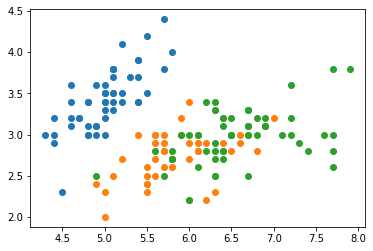

In [85]:
#未使用核方法时线性不可分
for i in range(3):
    tmp = i
    Xi = iris.data[iris.target==tmp]
    plt.scatter(Xi[:,0], Xi[:,1])
plt.show()

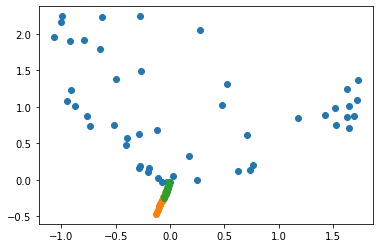

In [86]:
#使用核方法 kpca
if __name__ == '__main__':
    X,y = iris.data,iris.target
    kpca = KPCA('rbf')
    X_new = kpca.fit_transform(X)
    for i in range(3):
        tmp = y == i
        Xi = X_new[tmp]
        plt.scatter(Xi[:,0], Xi[:,1])
    plt.show()

In [58]:
from  sklearn.datasets  import load_sample_image

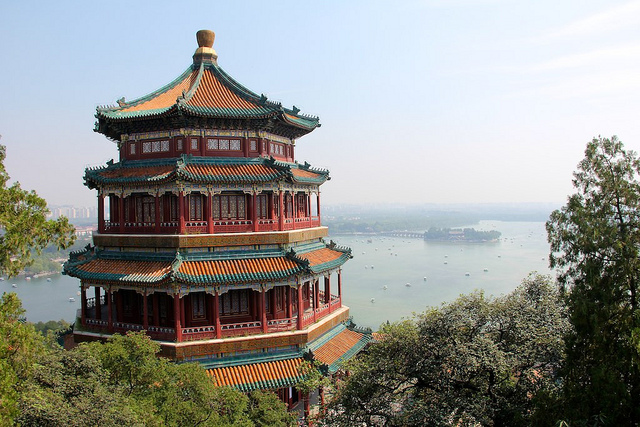

In [64]:
china  = load_sample_image("china.jpg")
from PIL import Image
Image.fromarray(china)

In [87]:
#使用核方法 kpca
if __name__ == '__main__':
    X=china[:,:,0]
    kpca = KPCA('rbf')
    X_new = kpca.fit_transform(X)
    print(X_new.shape)
    Image.fromarray(X_new)

(427, 2)


In [76]:
china[:,:,0].shape

(427, 640)

In [89]:
china.shape

(427, 640, 3)